In [1]:
from copy import deepcopy
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

In [2]:
#Parameter Initialization

k = 4 #클러스터 개수 
n = 400 #클러스터 당 생성한 샘플 개수
c = 2 #2차원 공간 

# Random data 생성 Module

In [3]:
def init_centroid(k,ax_lim=[-4,4]):
    from numpy.random import uniform as uniform
    centroid = []
    for i in range(k):
        centroid.append(np.array(uniform(ax_lim[0],ax_lim[1],[1,2])))
    def generate_data(n,centroid):
        df = np.empty((1,c),float)
        for i in centroid:
            data = np.random.randn(n,c)+ i 
            df= np.append(df, data,axis=0)
        return df
    df = generate_data(n,centroid)
    return centroid, df

In [4]:
centroid, df = init_centroid(k)

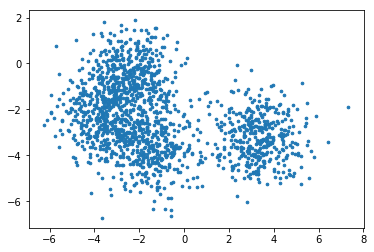

In [5]:
plt.scatter(df[:,0], df[:,1], s=7)

# Optimization Module

In [7]:
def optimize(df):
    # Centroid 좌표 초기화
    # 샘플의 평균 좌표값과 표준편차를 이용
    mean = np.mean(df, axis = 0)
    std = np.std(df, axis = 0)
    centers = np.random.randn(k,c)*std + mean

    centers_old = np.zeros(centers.shape) # centroid 의 이전 좌표
    centers_new = centers # 새 좌표


    clusters = np.zeros(df.shape[0])
    distances = np.zeros((df.shape[0],k))

    error = np.linalg.norm(centers_new - centers_old)

    while error != 0:
        # 모든 centroid 에서의 거리 측정
        for i in range(k):
            distances[:,i] = np.linalg.norm(df - centers[i], axis=1)
        # 샘플을 가장 가까운 centorid 클러스터로 이동 
        clusters = np.argmin(distances, axis = 1)

        centers_old = centers_new
        # 샘플의 중심지로 centroid 좌표 업데이트
        for i in range(k):
            centers_new[i] = np.mean(df[clusters == i], axis=0)
        error = np.linalg.norm(centers_new - centers_old)    
    return centers_new, clusters

# Iris 데이터를 이용해서 검증 

In [8]:
def validation(df, label):
    centers_new, clusters = optimize(df)
    cnt = 0 
    for idx,ans in enumerate(clusters):
        if ans == int(label[idx]):
            cnt += 1
    acc = cnt/len(label)
    print('정확도: {} '.format(acc))
    

In [9]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y  = True)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
c = X.shape[1] #Iris 데이터의 차원수로 조정 
k = 3 # Iris 데이터의 cluster 개수로 조정
validation(X,y)

정확도: 0.62 
